# Ablation Auxiliary Subject 

In [1]:
# Imports
# !pip install torchinfo
import torch
from torchinfo import summary
import matplotlib.pyplot as plt
import os
import gc
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import TrainerVTS_V08F3_ablation_noaux as TP
import DataSetting_v5 as DS

In [2]:
date = '20240920_A308'
name = f'{date}_Abaux_sub'
data_path = [
    #'../dataset/Door_EXP/A208',
             '../dataset/Door_EXP/A308',
#             '../dataset/Door_EXP/B211',
#             '../dataset/Door_EXP/C605'
            ]
level = 'subject'

data_organizer = DS.DataOrganizer(name, data_path, level)
data_organizer.load()

Cross validation plan at subject level
Loading ../dataset/Door_EXP/A308...

Loaded 0717D13-csi.npy of shape (10707, 30, 3, 3)
Loaded 0717D10-csi.npy of shape (10727, 30, 3, 3)
Loaded 0717D04-csi.npy of shape (976630, 30, 3)
Loaded 20240716_145635-rimg.npy of shape (6080, 128, 226)
Loaded 20240716_145943-rimg.npy of shape (10224, 128, 226)
Loaded 20240716_150946-rimg.npy of shape (14989, 128, 226)
Loaded 20240716_152801-rimg.npy of shape (8856, 128, 226)
Loaded 20240716_154608-rimg.npy of shape (11393, 128, 226)
Loaded 20240716_155647-rimg.npy of shape (14647, 128, 226)
Loaded 20240716_160748-rimg.npy of shape (5388, 128, 226)
Loaded 20240716_161016-rimg.npy of shape (10542, 128, 226)
Loaded 20240716_161503-rimg.npy of shape (8882, 128, 226)
Loaded 20240716_161921-rimg.npy of shape (12753, 128, 226)
Loaded 20240717_140652-rimg.npy of shape (6292, 128, 226)
Loaded 20240717_144210-rimg.npy of shape (9416, 128, 226)
Loaded 20240717_144654-rimg.npy of shape (11891, 128, 226)
Loaded 20240716

In [3]:
print(data_organizer.total_segment_labels)

        env      subject              bag      csi  group  segment  \
0      A308         chen  20240716_152801  0716D01    4.0      0.0   
1      A308         chen  20240716_152801  0716D01    4.0      0.0   
2      A308         chen  20240716_152801  0716D01    4.0      0.0   
3      A308         chen  20240716_152801  0716D01    4.0      0.0   
4      A308         chen  20240716_152801  0716D01    4.0      0.0   
...     ...          ...              ...      ...    ...      ...   
50069  A308  higashinaka  20240716_155647  0716D02    7.0     19.0   
50070  A308  higashinaka  20240716_155647  0716D02    7.0     19.0   
50071  A308  higashinaka  20240716_155647  0716D02    7.0     19.0   
50072  A308  higashinaka  20240716_155647  0716D02    7.0     19.0   
50073  A308  higashinaka  20240716_155647  0716D02    7.0     19.0   

           timestamp img_inds csi_inds  Unnamed: 0  
0      1721111282751       59   467958     22032.0  
1      1721111282818       61   468025     22034.0  


### Teacher

In [4]:
# data_organizer.batch_size = 1
preprocess = DS.Preprocess(new_size=(128, 128))

torch.cuda.set_device(gpu)
# data_organizer.gen_plan(subset_ratio=0.2, save=True)
data_organizer.load_plan('../dataset/Door_EXP/subject_r0.2.pkl')

Loaded plan!


In [ ]:
for i in range(6):
    data_organizer.gen_plan(subset_ratio=0.2)
    train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='t')
    if current_test == 'higashinaka' or current_test == 'jiao':
        continue
    T_trainer = TP.TeacherTrainer(beta=0.5,
                              name='Teacher',
                              loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                              lr=1e-4, epochs=10, cuda=gpu,
                                  preprocess = preprocess,
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                              notion=f'{name}_{current_test}')

    T_trained = T_trainer.schedule(lr_decay=True)

Generating loaders for t...
Train dataset length = 8308
Test dataset length = 3288
 exported train loader of len 103, batch size = 64
 exported valid loader of len 25, batch size = 64
 exported test loader of len 3288, batch size = 1

Generating loaders for t...
Train dataset length = 9843
Test dataset length = 1753
 exported train loader of len 123, batch size = 64
 exported valid loader of len 30, batch size = 64
 exported test loader of len 1753, batch size = 1

==========20240911_Sub_Prop_zhang Teacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:06<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:01<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:46<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

### Student

In [4]:
preprocess = DS.Preprocess(new_size=(128, 128))
data_organizer.load_plan('../dataset/Door_EXP/subject_r0.2_A308.pkl')

def run_s():
    for i in range(6):
        data_organizer.gen_plan(subset_ratio=0.2)
        train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s', num_workers=0)
        if current_test in ('higashinaka', 'jiao'):
            continue
        S_trainer = TP.StudentTrainer(name='Student',
                                      lstm_steps = 75,
                                      beta=0.5,
                                      loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                      lr=1e-4, epochs=10, cuda=gpu,
                                      preprocess = preprocess,
                                      notion=f'{name}_{current_test}',
                                      train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                                     )
        S_trainer.models['imgen'].load_state_dict(torch.load(f"../saved/20240911_Sub_Prop_{current_test}/Teacher_imgen_best.pth"))
        S_trainer.models['rimgde'].load_state_dict(torch.load(f"../saved/20240911_Sub_Prop_{current_test}/Teacher_rimgde_best.pth"))
        S_trained = S_trainer.schedule(lr_decay=True, train_module={'csien'}, eval_module={'imgen', 'rimgde'})

        del S_trainer
        del S_trained
        torch.cuda.empty_cache()
        gc.collect()

Loaded plan!


Generating loaders for s: level = subject, current test = wang
 Train dataset length = 8581
 Test dataset length = 1433
 Exported train loader of len 107, batch size = 64
 Exported valid loader of len 26, batch size = 64
 Exported test loader of len 23, batch size = 1

==========20240920_A308_Abaux_sub_wang Student Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 432x288 with 0 Axes>

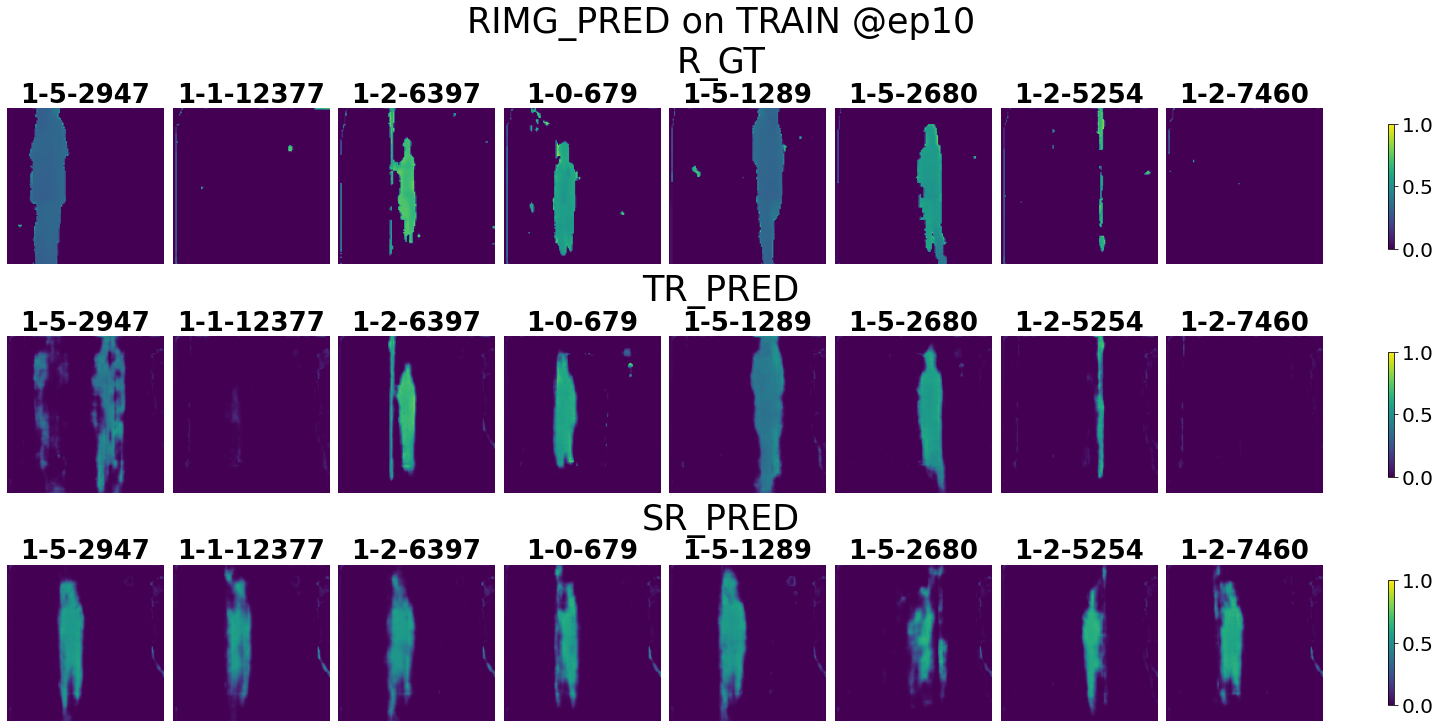

<Figure size 1440x720 with 0 Axes>

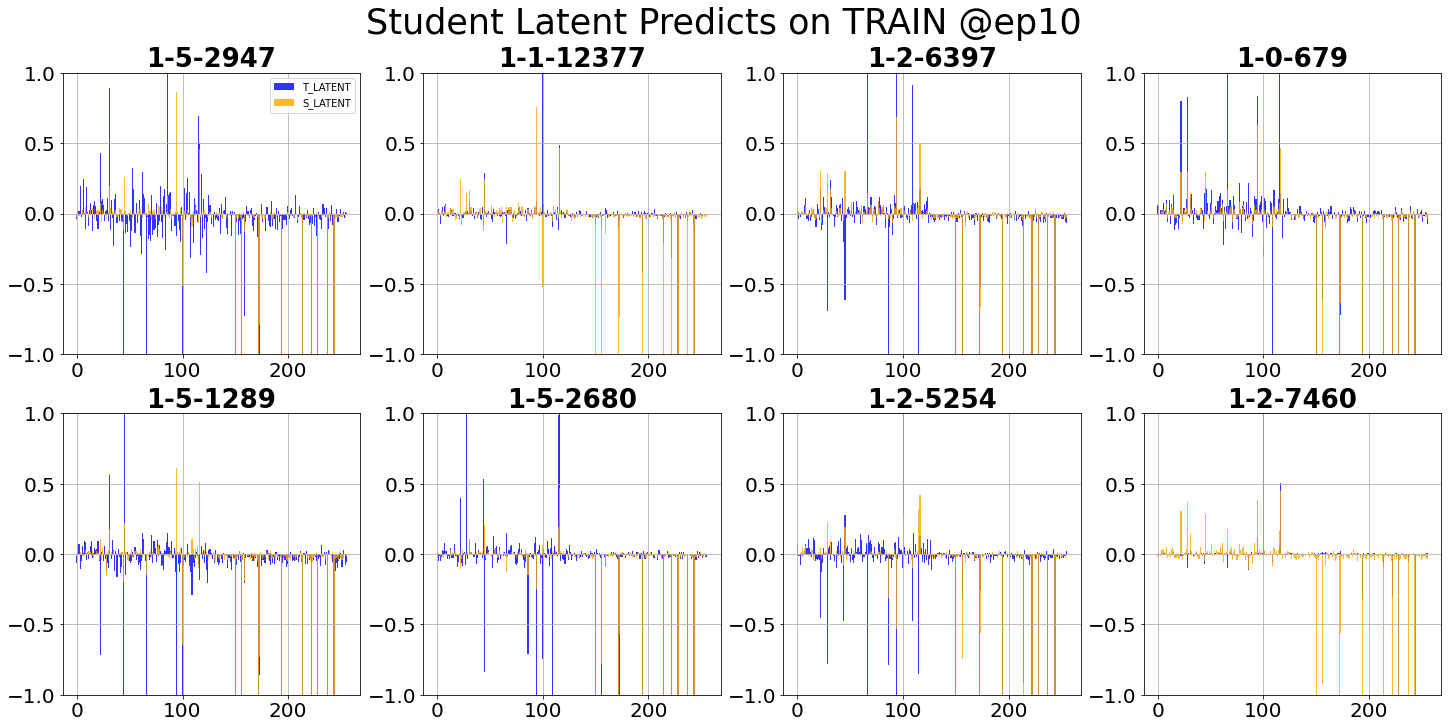

/home/bob/datastore/Models/Loss.py:234: RuntimeWarning: invalid value encountered in true_divide
  cdf = np.cumsum(hist / sum(hist))
/home/bob/datastore/Models/Loss.py:236: RuntimeWarning: invalid value encountered in true_divide
  axes[i].bar(bin_edges[1:], hist / max(hist), width=width, color='blue')


<Figure size 1440x720 with 0 Axes>

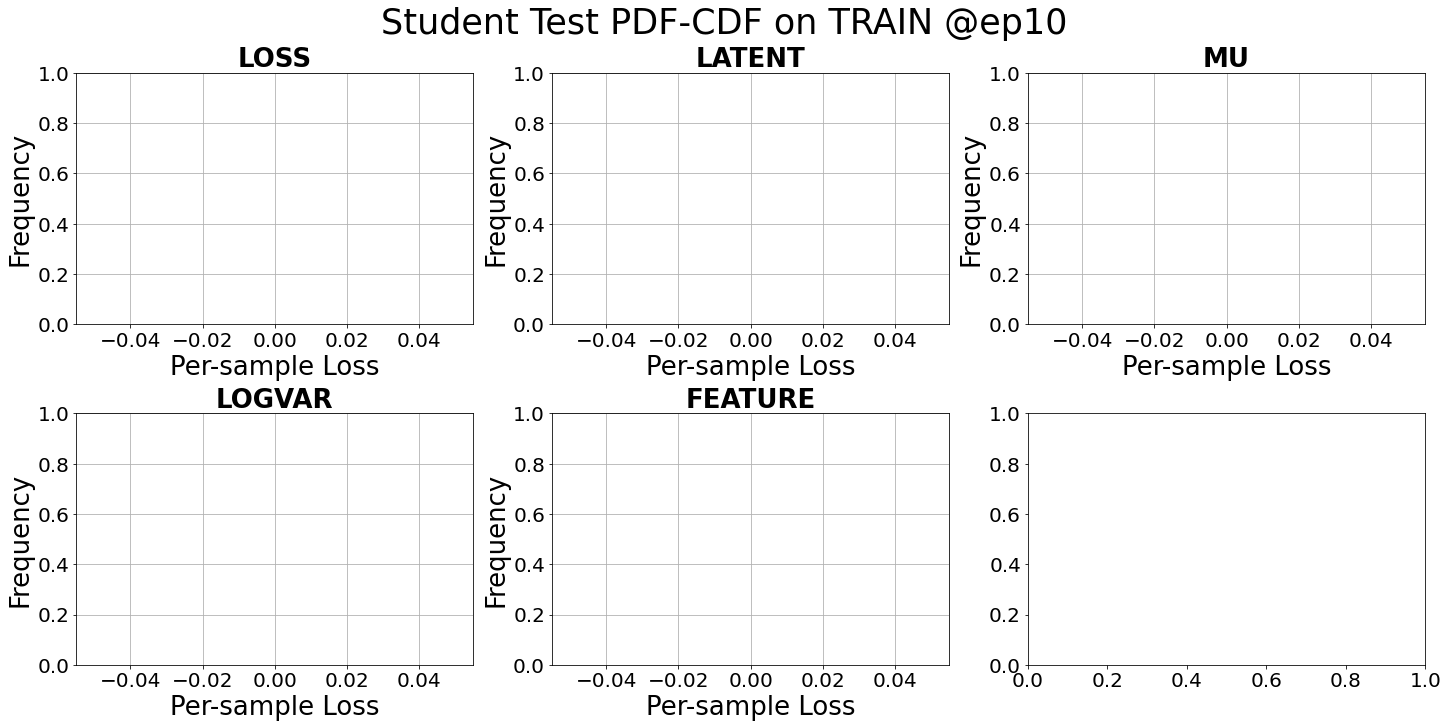

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

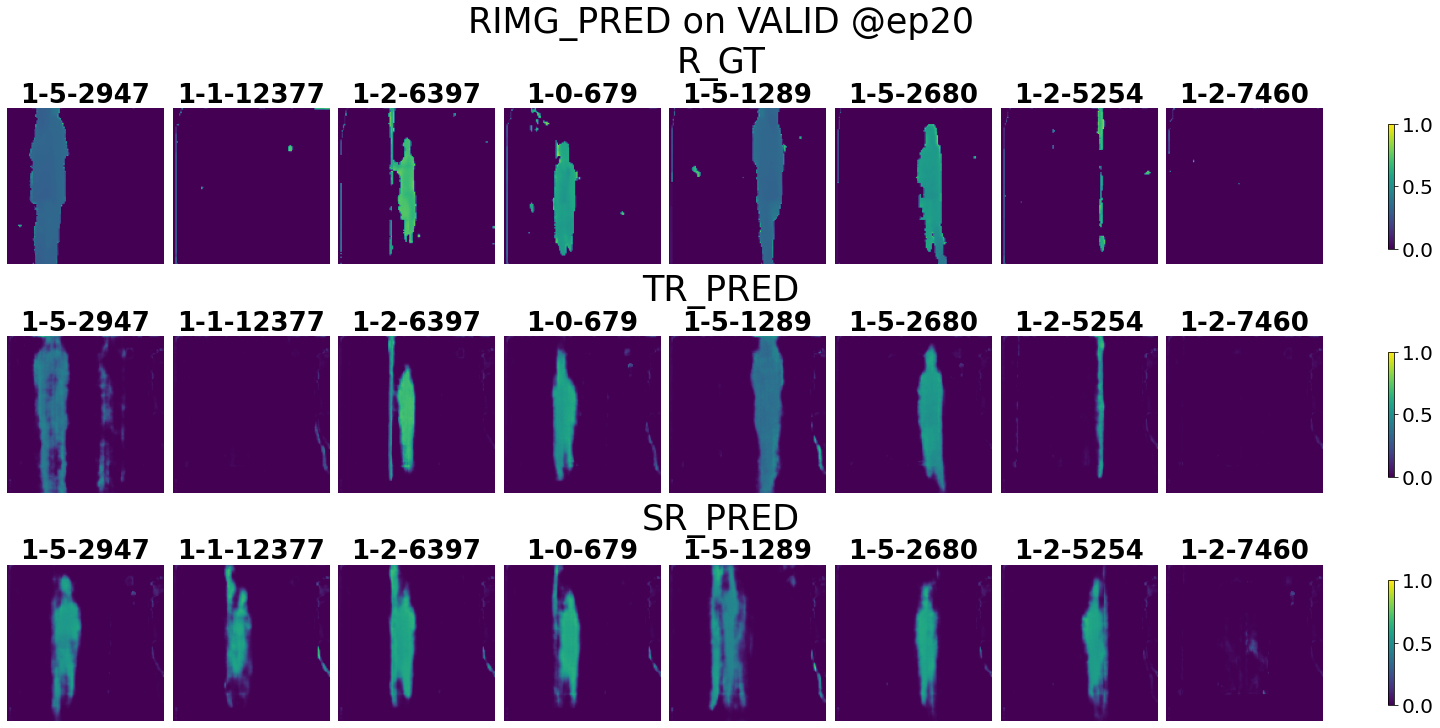

<Figure size 1440x720 with 0 Axes>

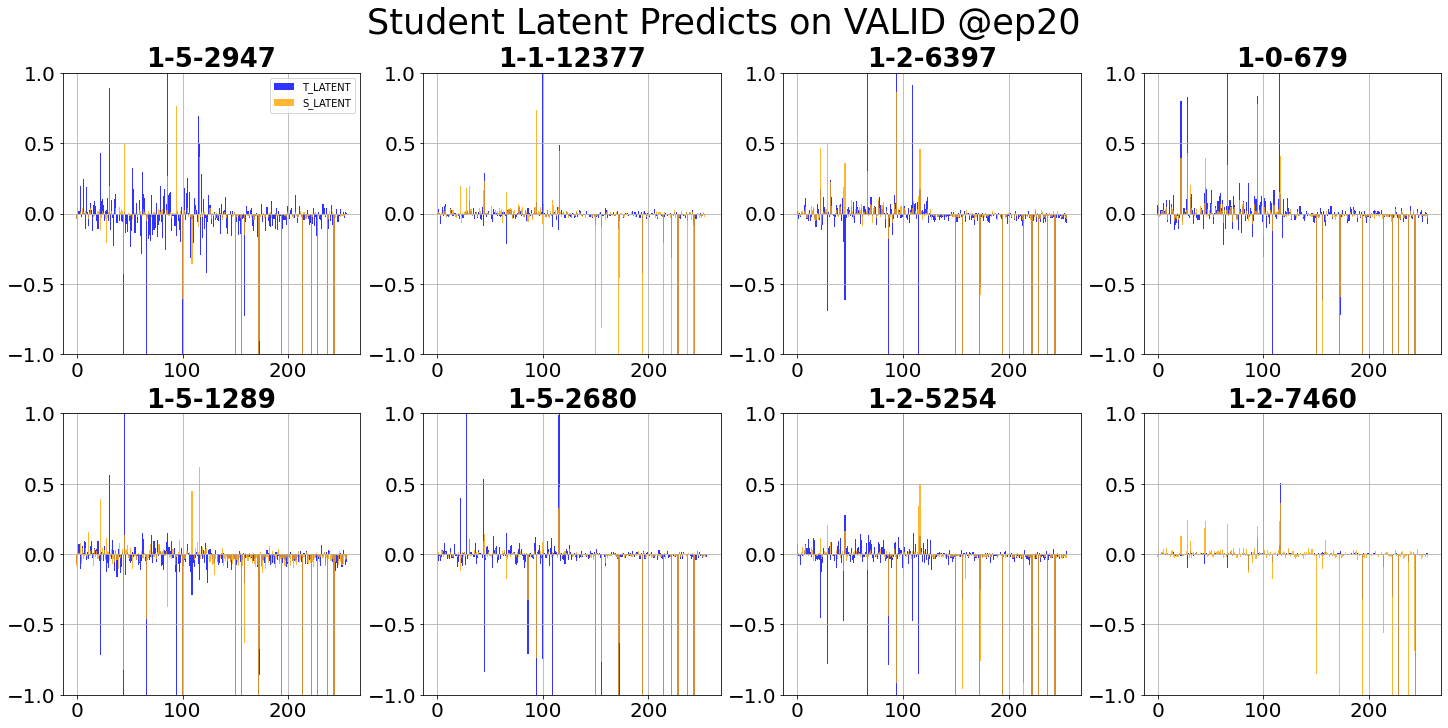

<Figure size 1440x720 with 0 Axes>

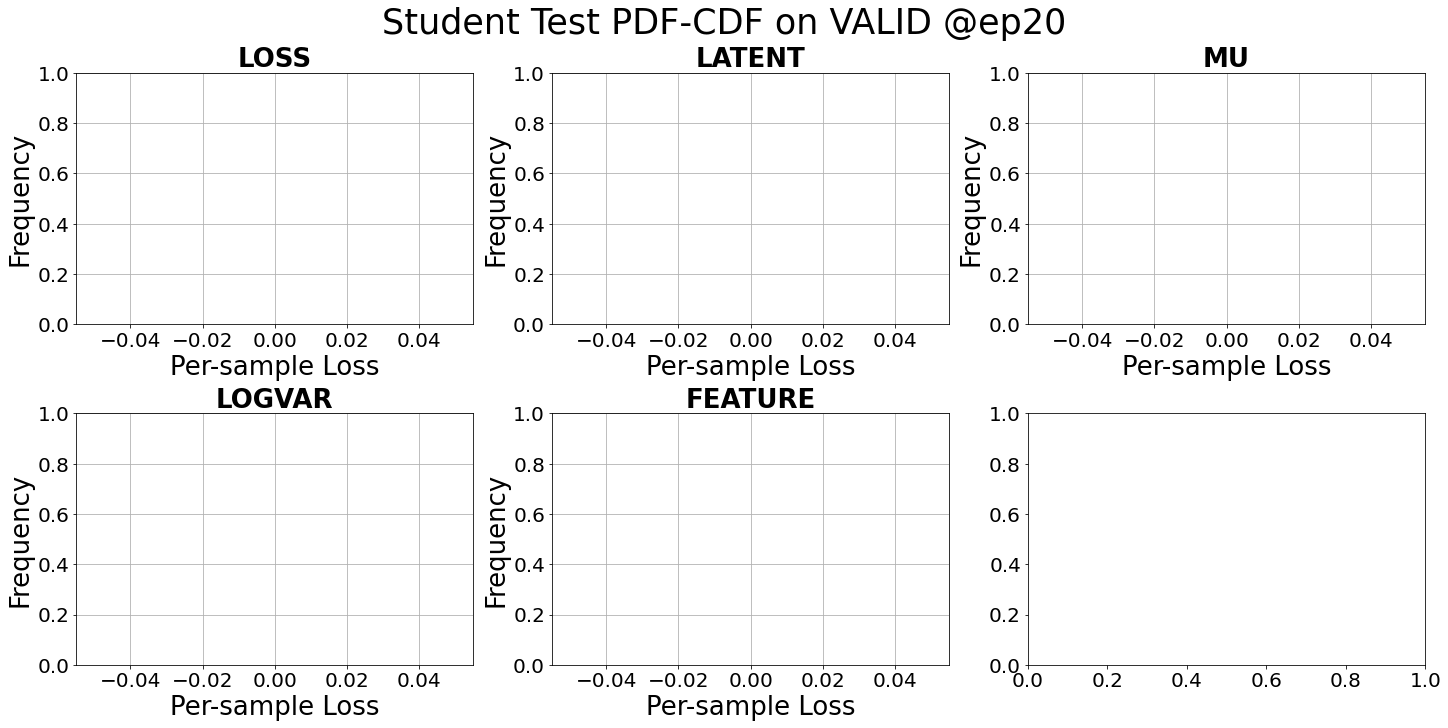

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

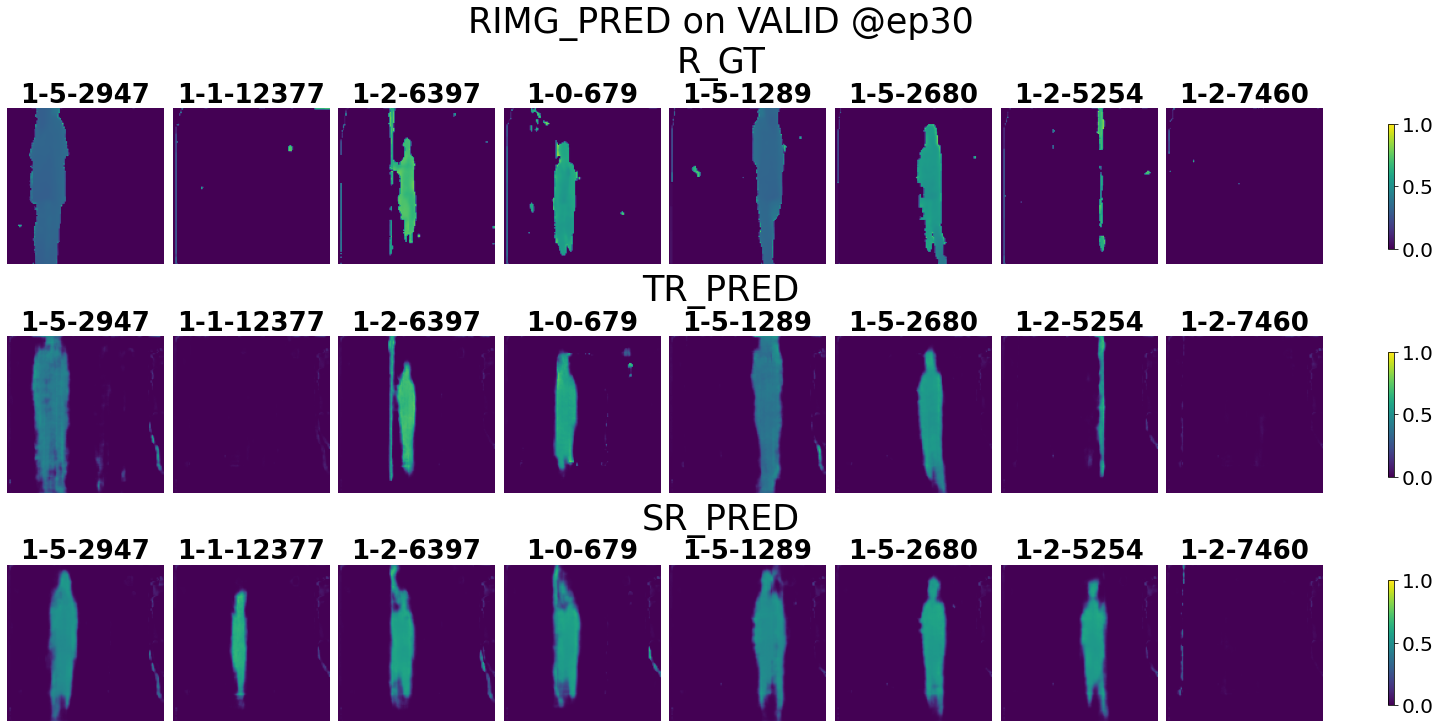

<Figure size 1440x720 with 0 Axes>

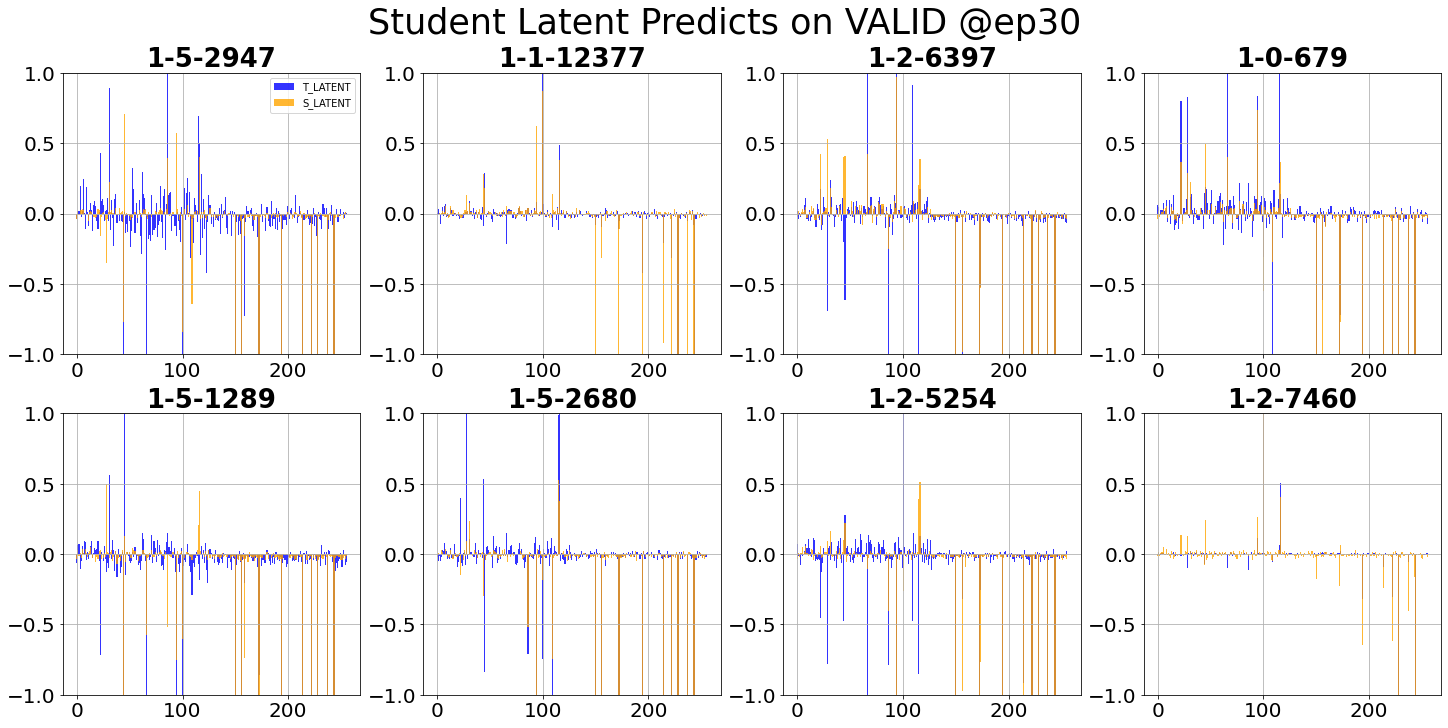

<Figure size 1440x720 with 0 Axes>

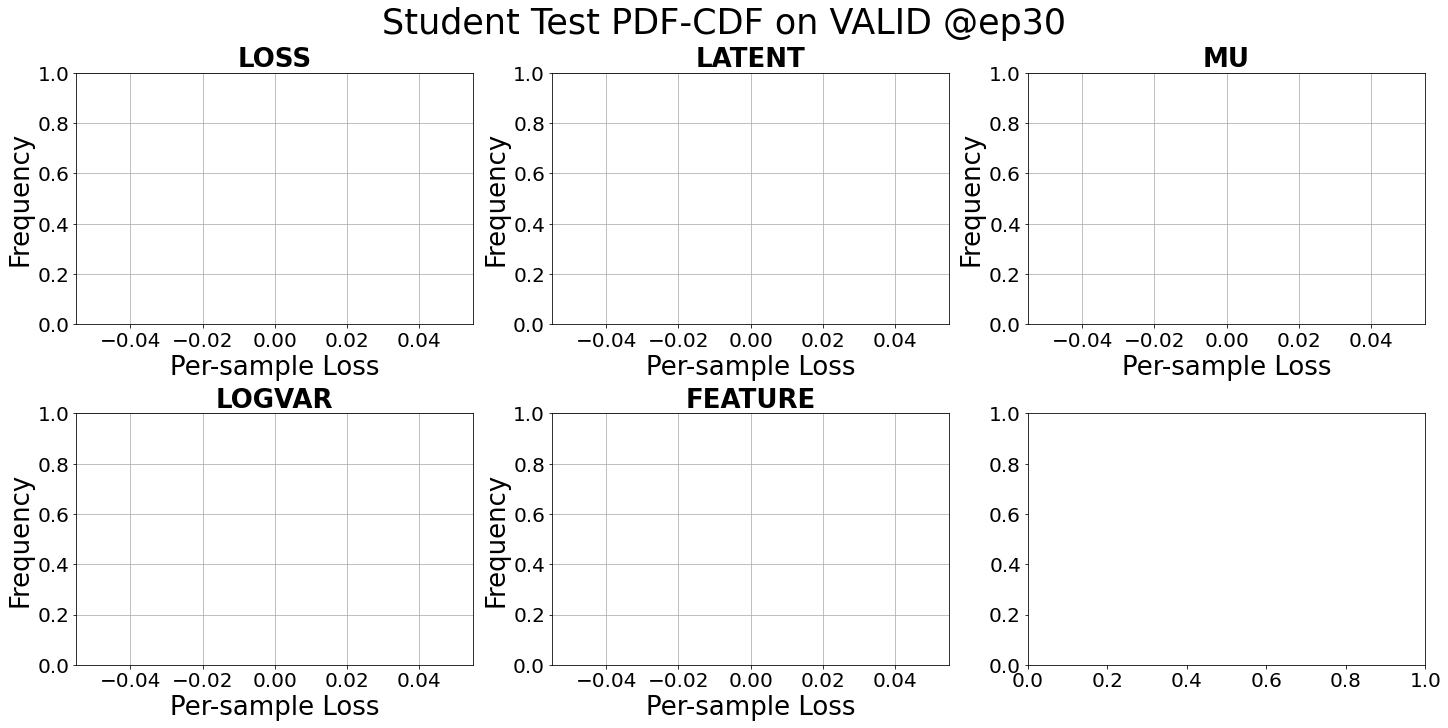

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

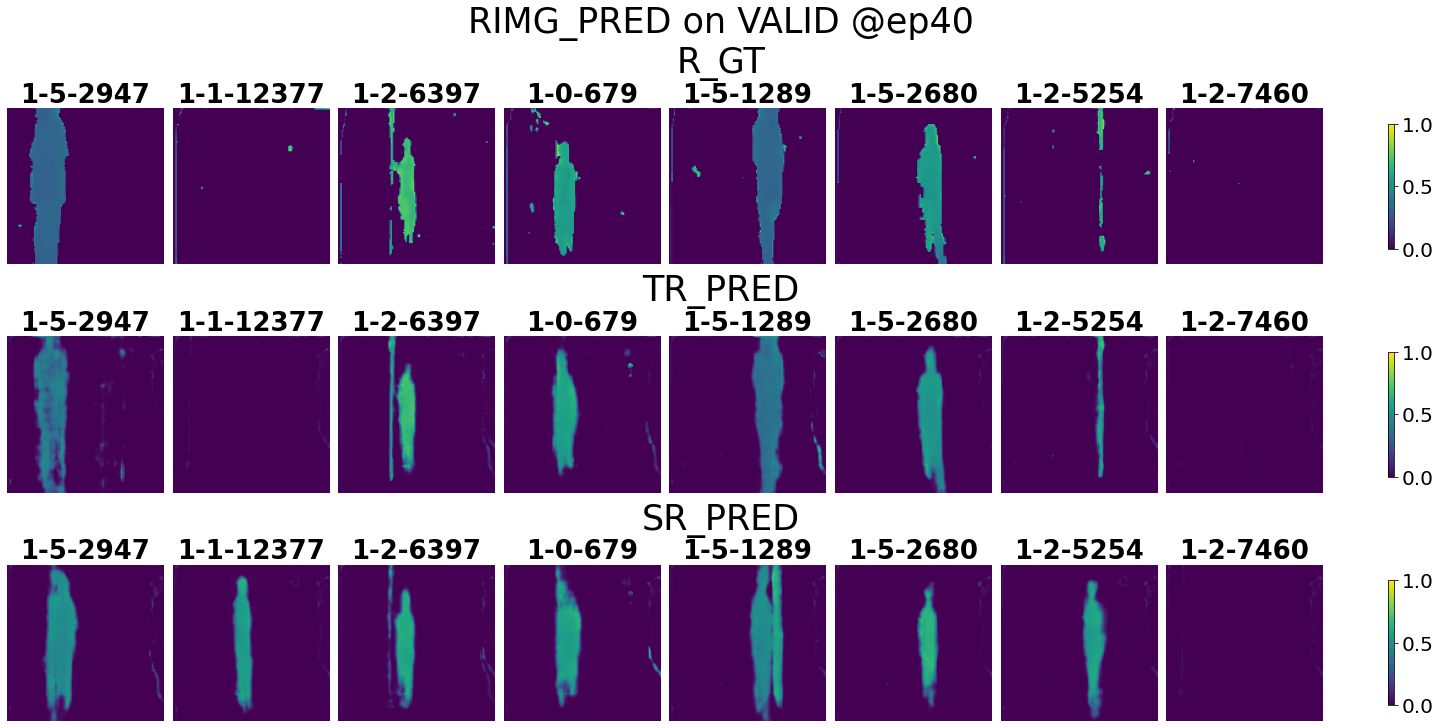

<Figure size 1440x720 with 0 Axes>

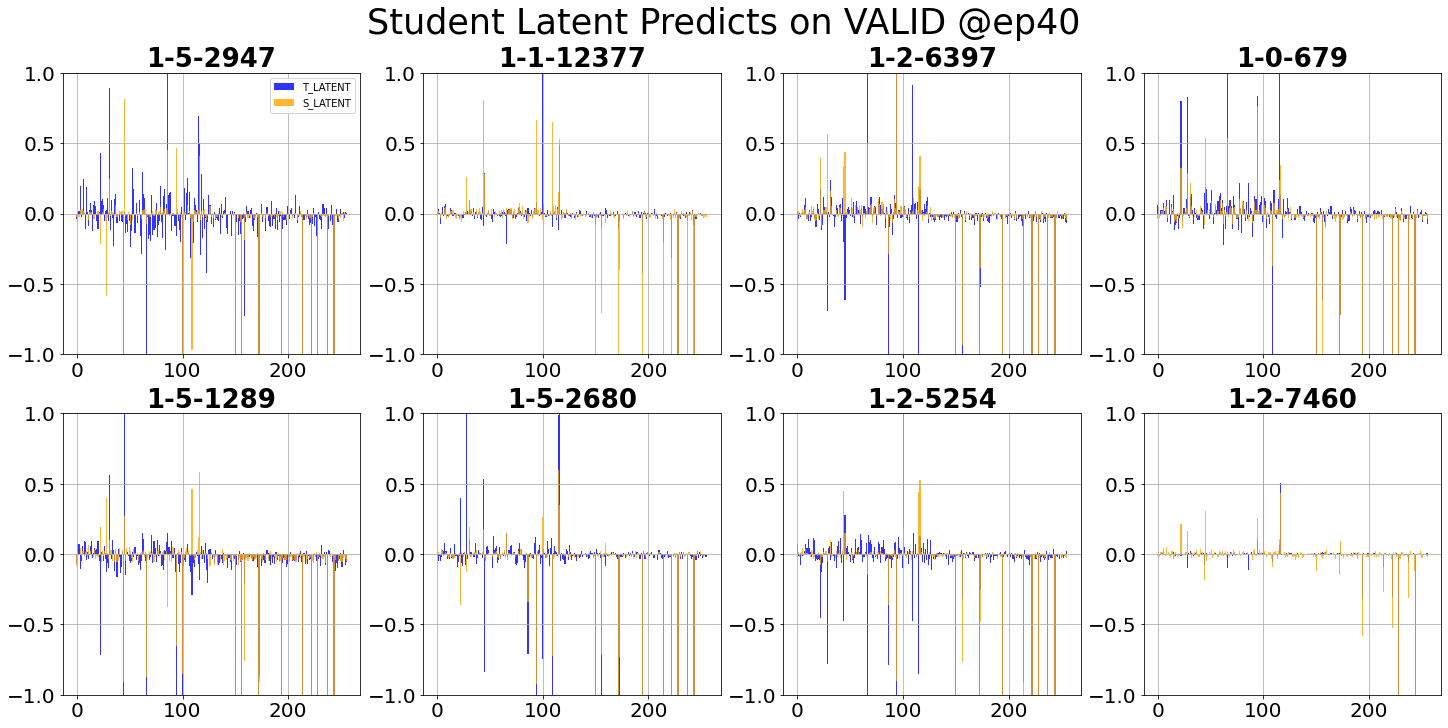

<Figure size 1440x720 with 0 Axes>

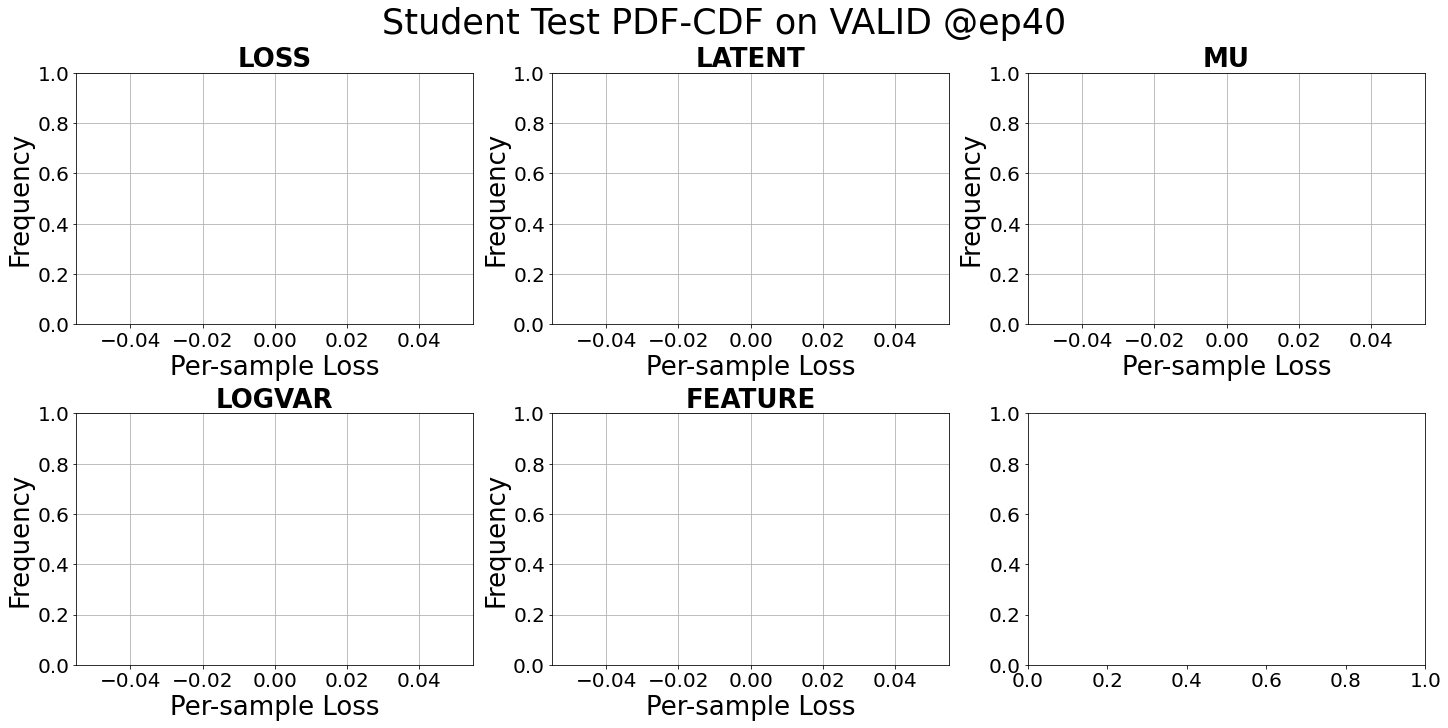

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:01<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

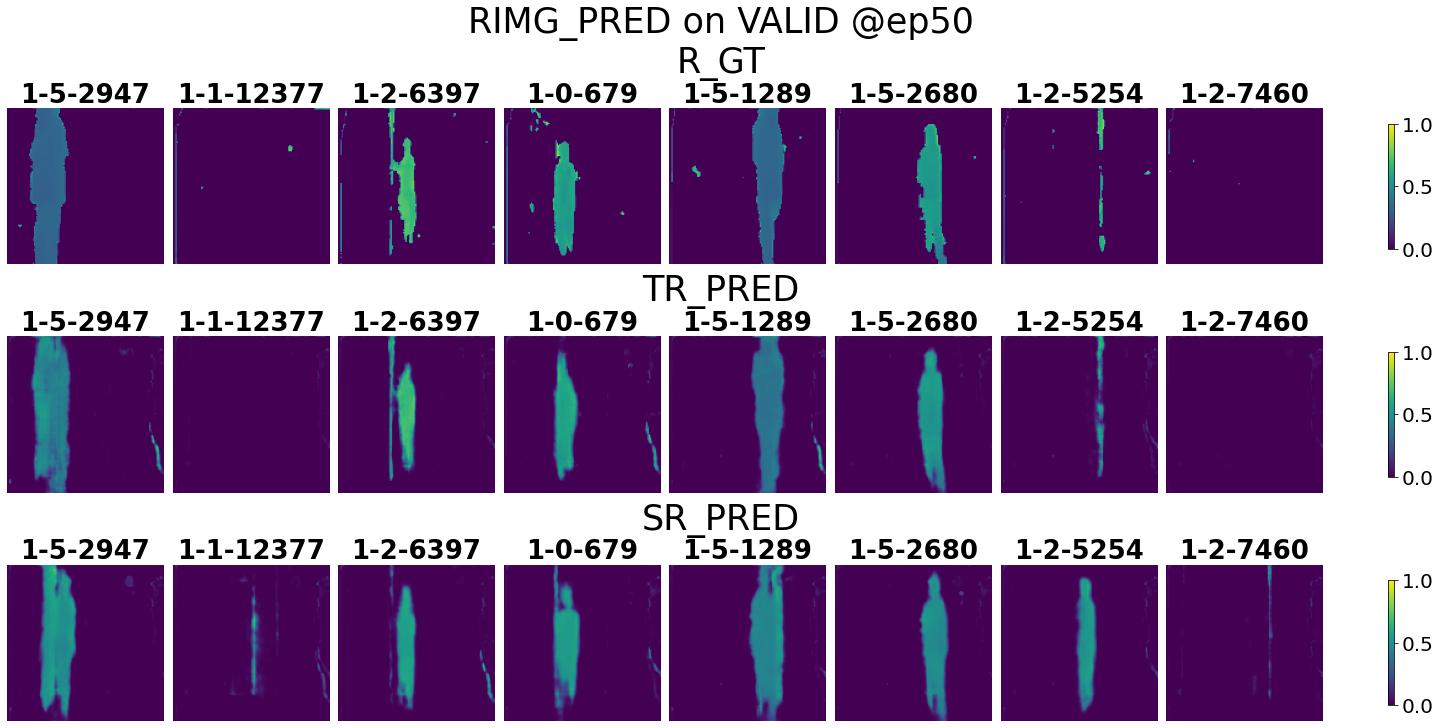

<Figure size 1440x720 with 0 Axes>

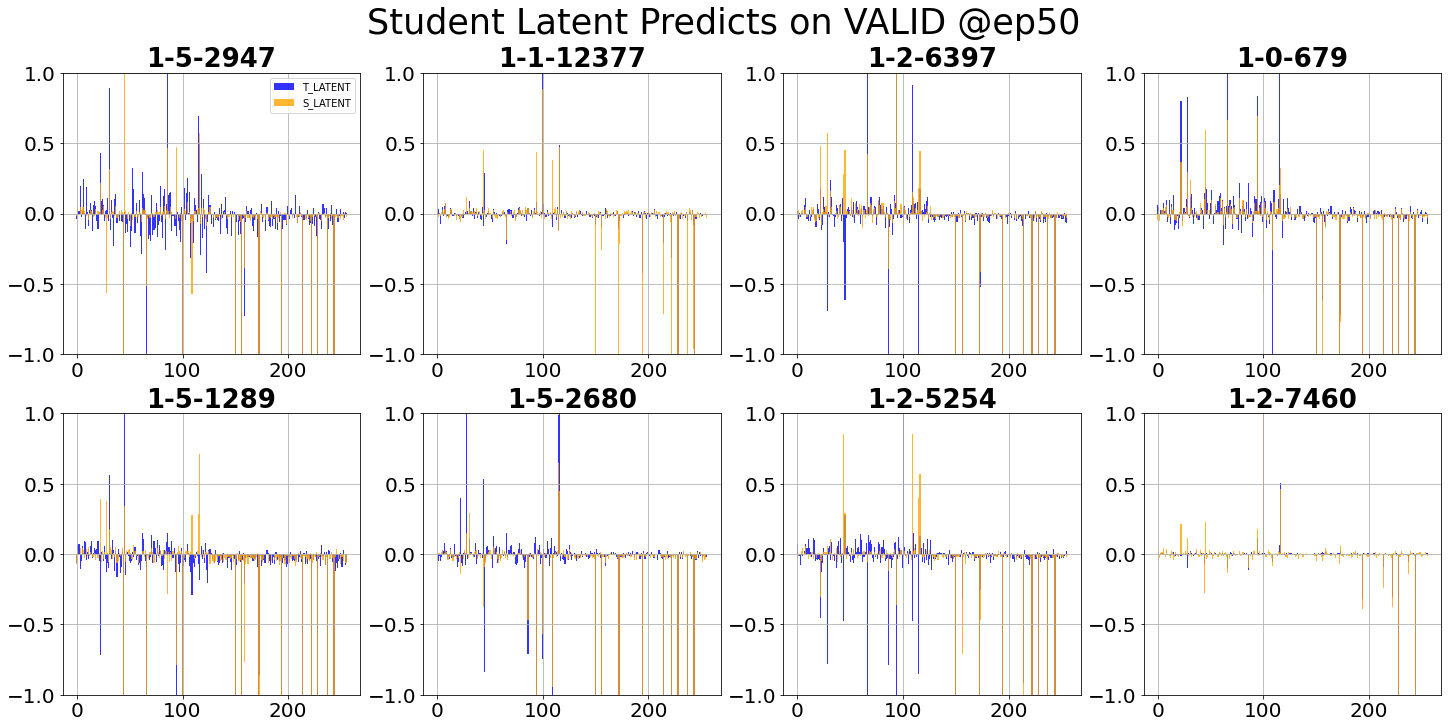

<Figure size 1440x720 with 0 Axes>

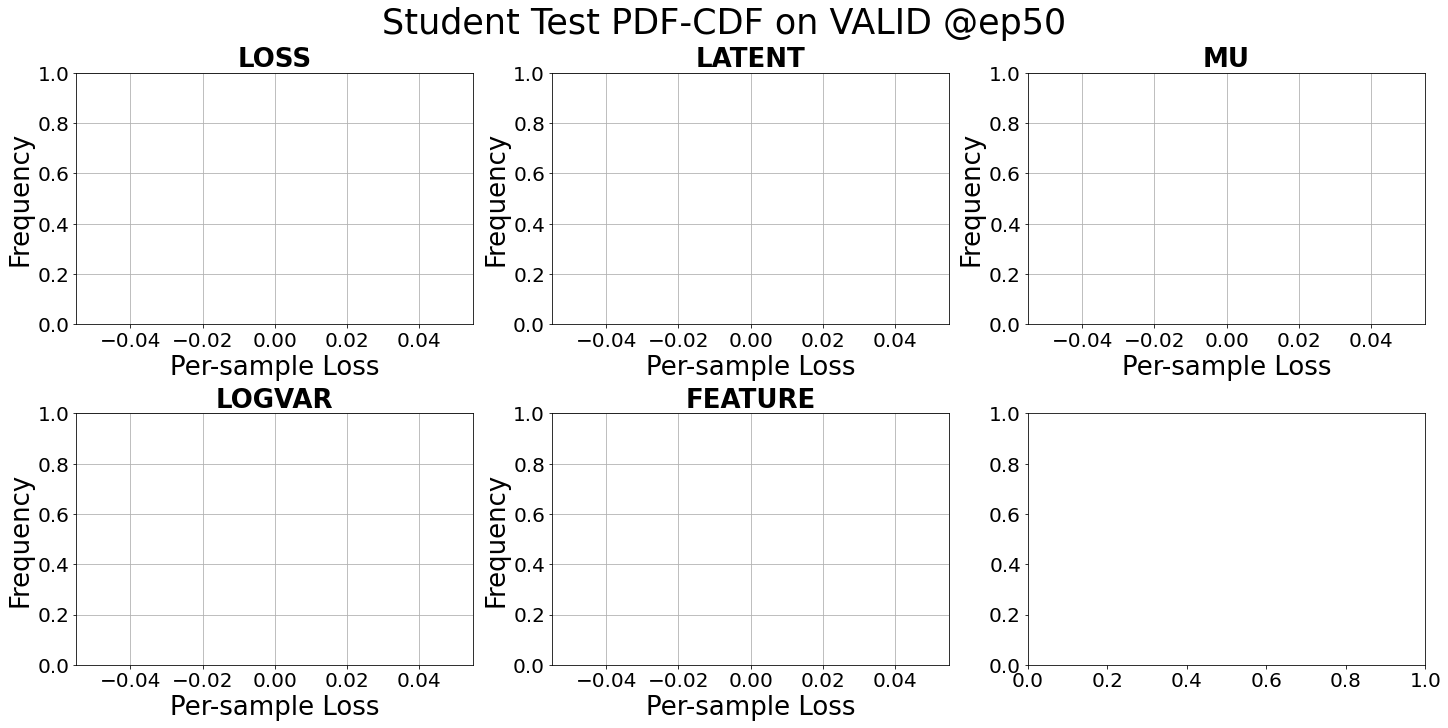

Saving models...
Saving imgen...
Saving rimgde...
Saving csien...
All saved!



  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

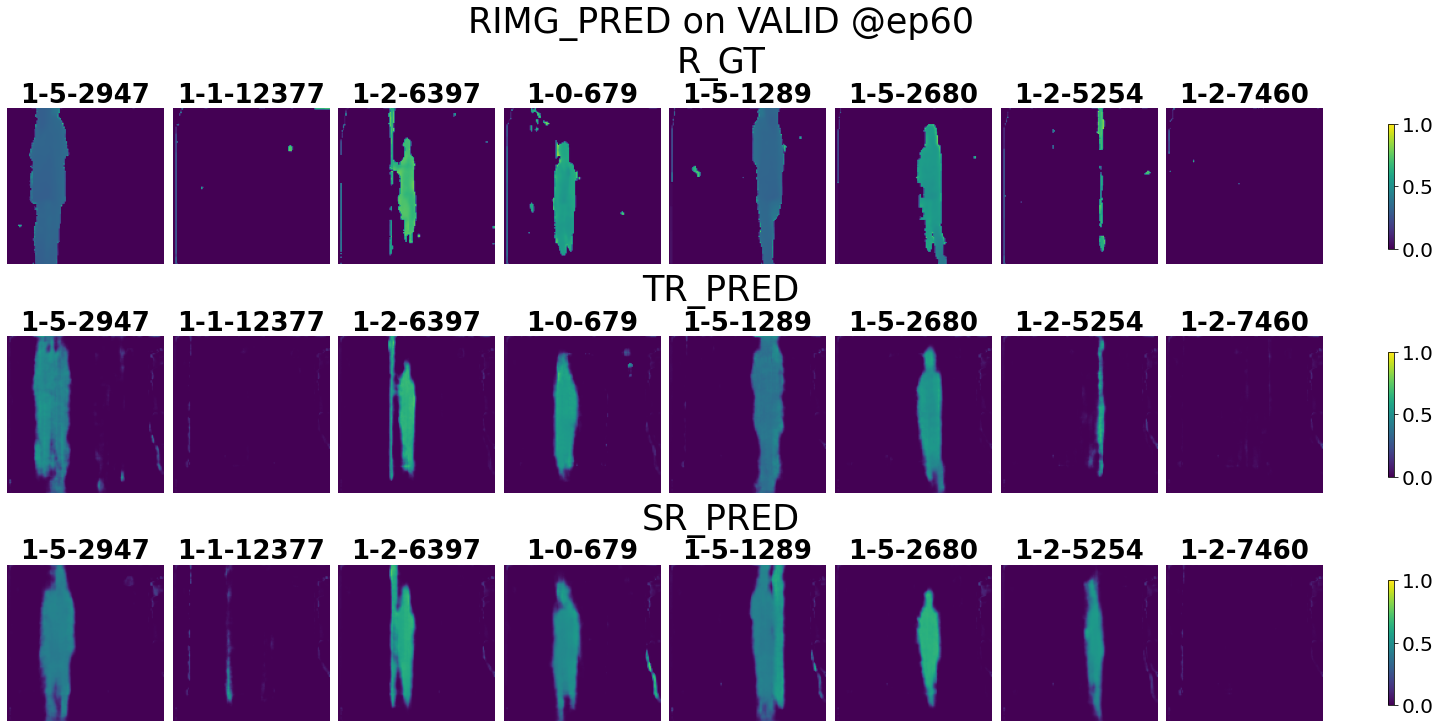

<Figure size 1440x720 with 0 Axes>

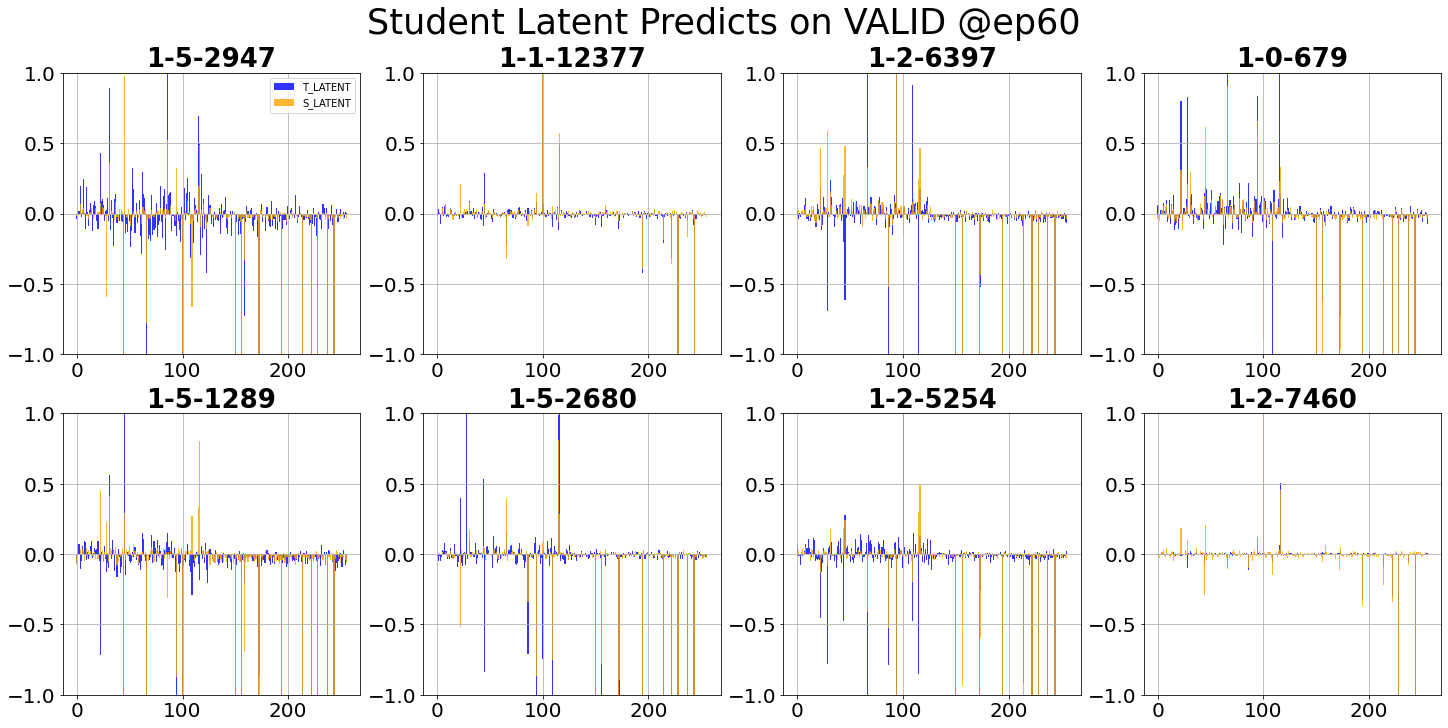

<Figure size 1440x720 with 0 Axes>

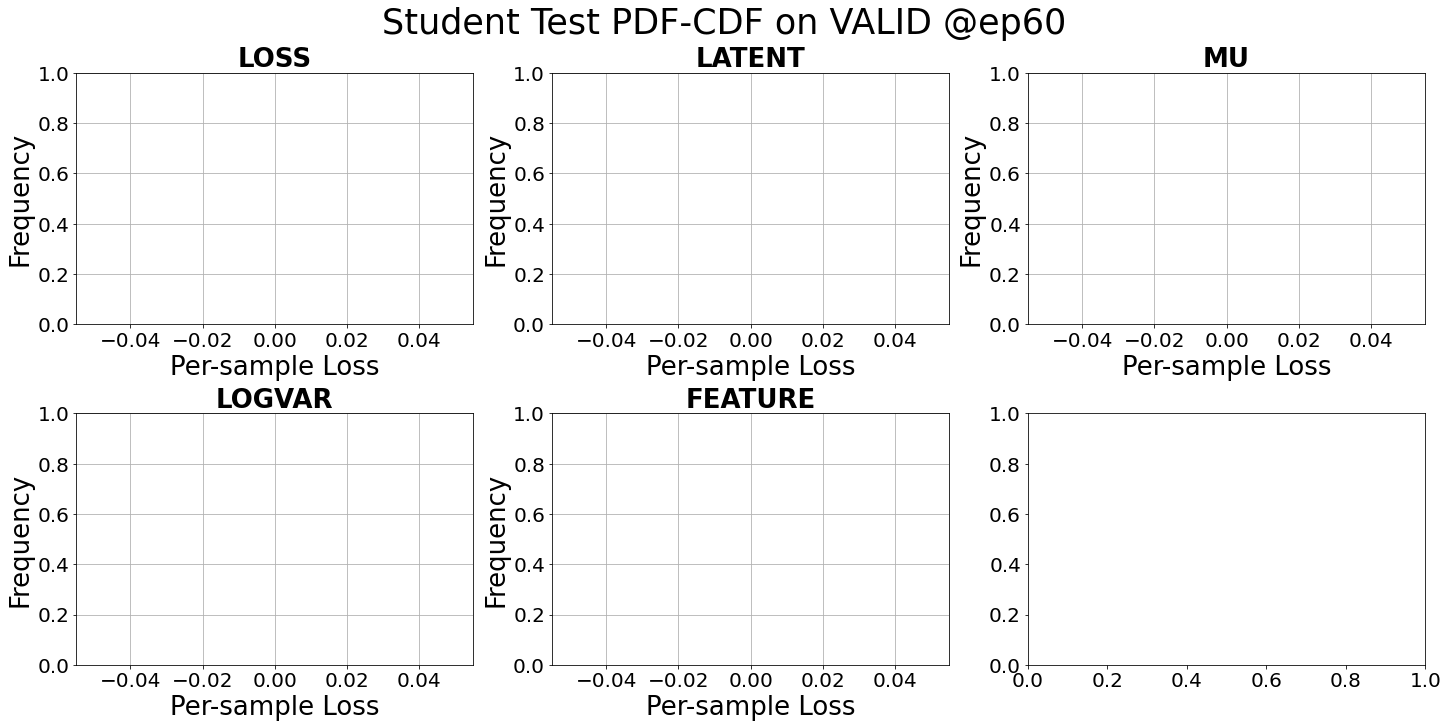

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

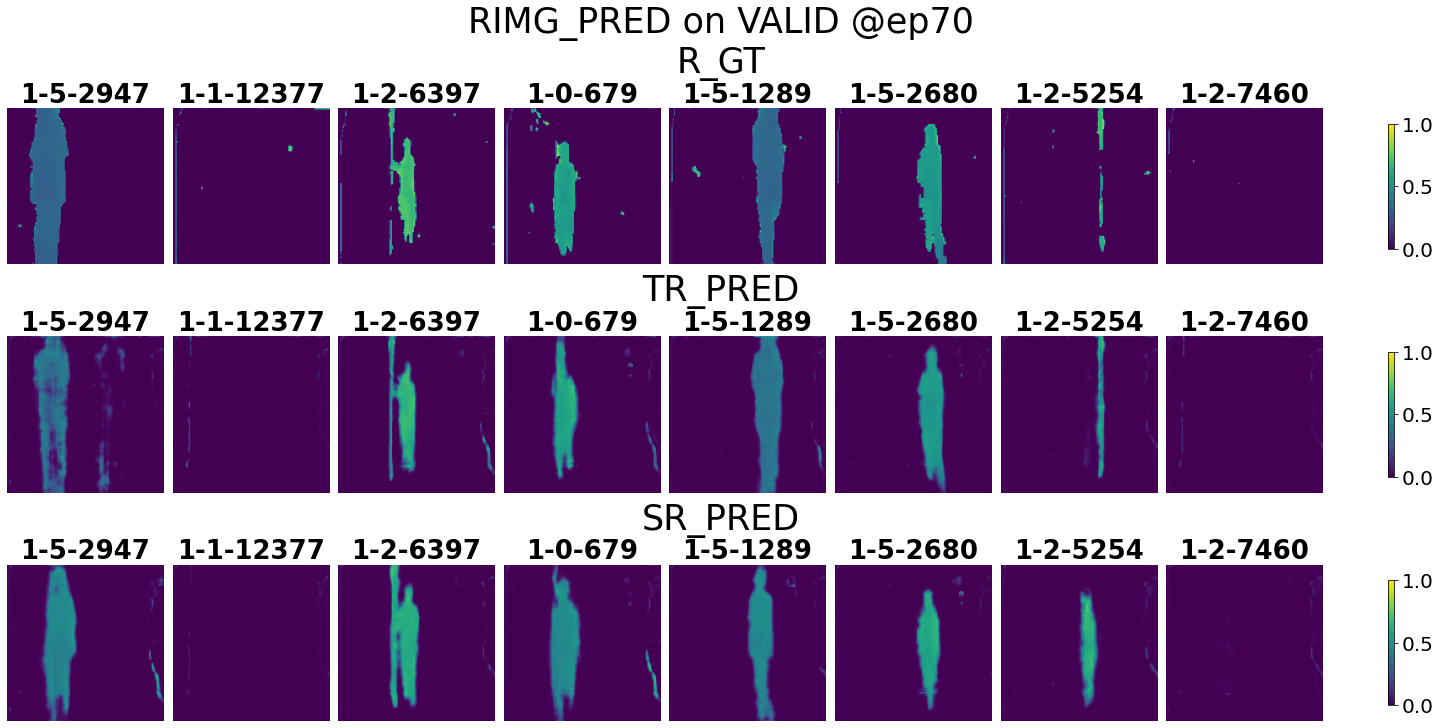

<Figure size 1440x720 with 0 Axes>

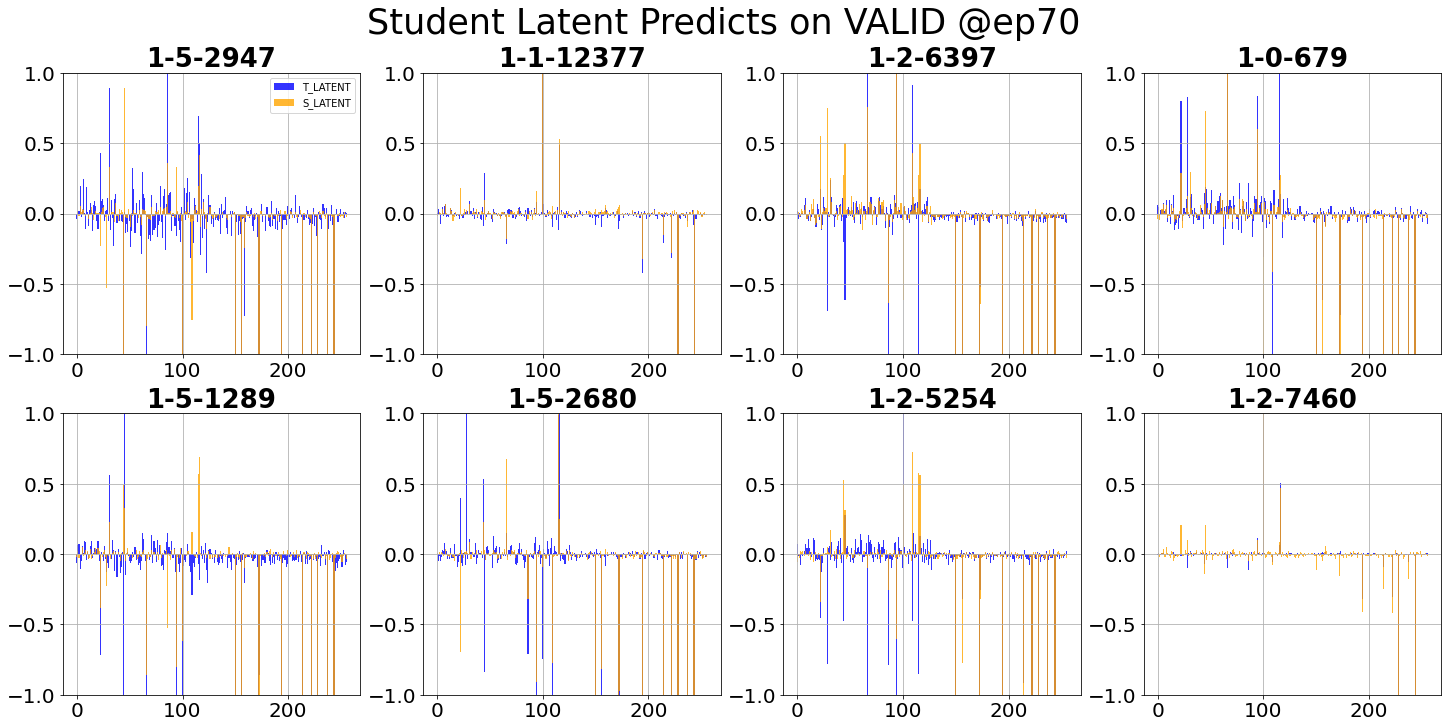

<Figure size 1440x720 with 0 Axes>

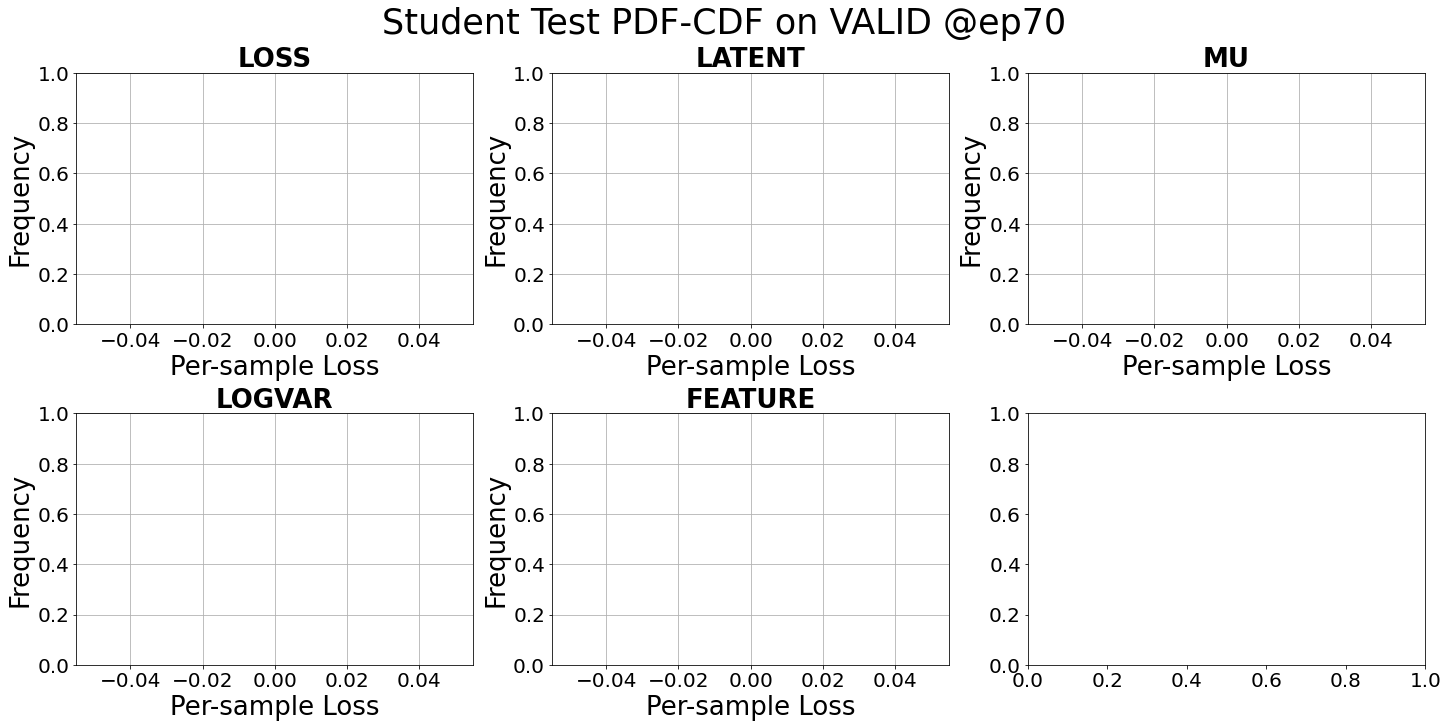

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:33<?]

<Figure size 1440x720 with 0 Axes>

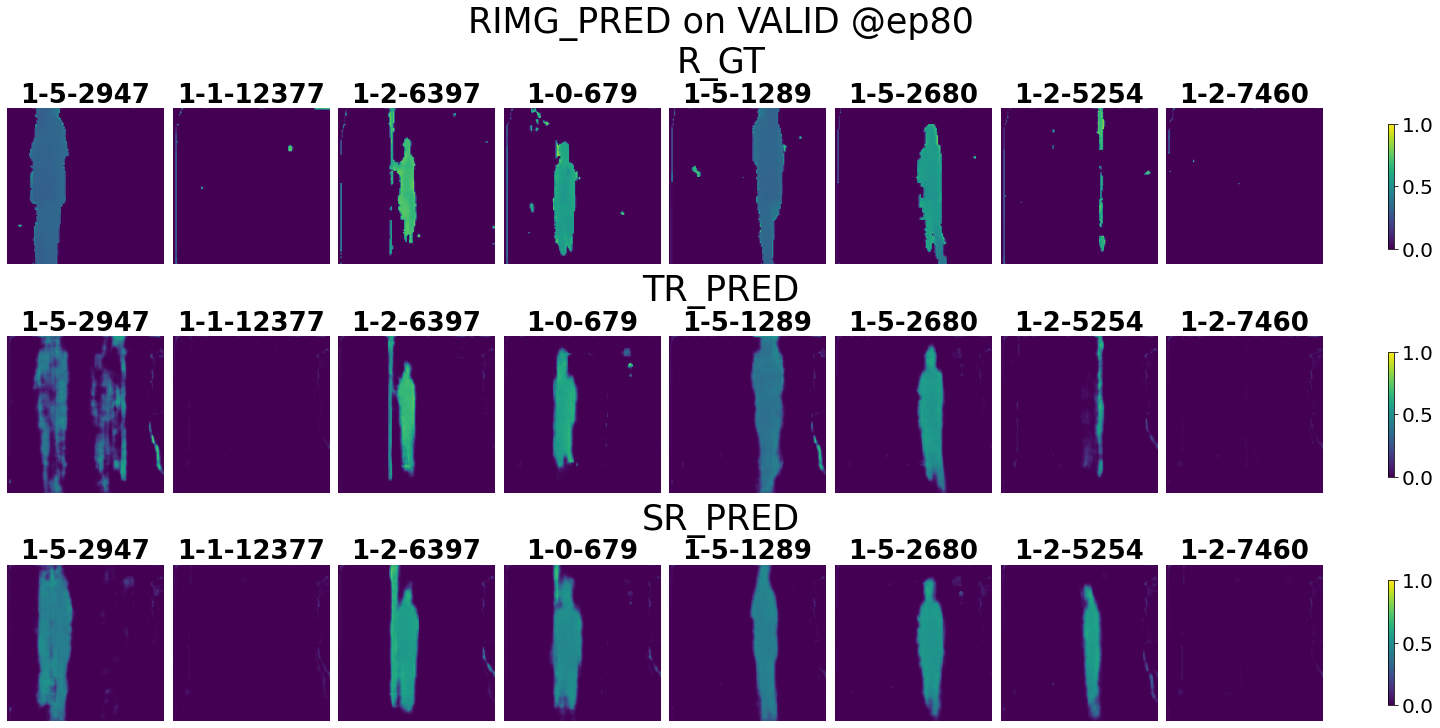

<Figure size 1440x720 with 0 Axes>

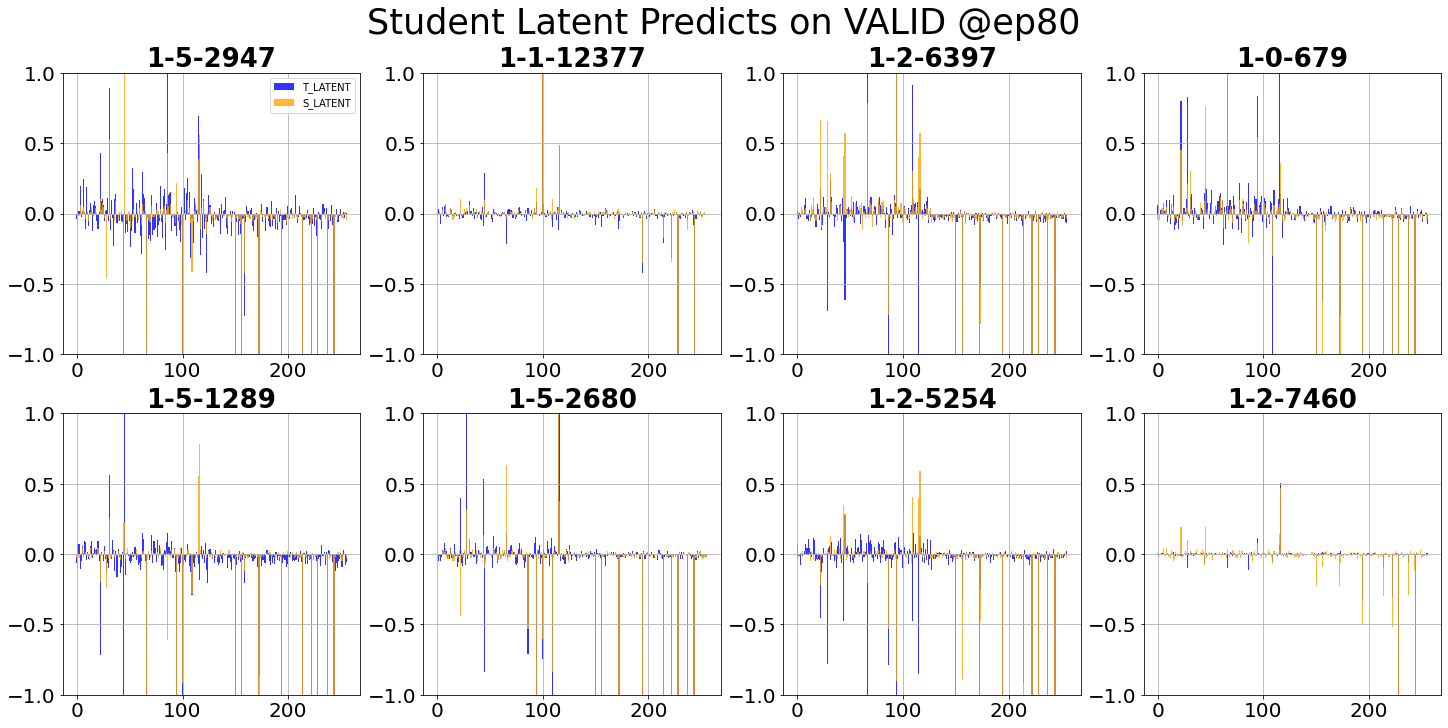

<Figure size 1440x720 with 0 Axes>

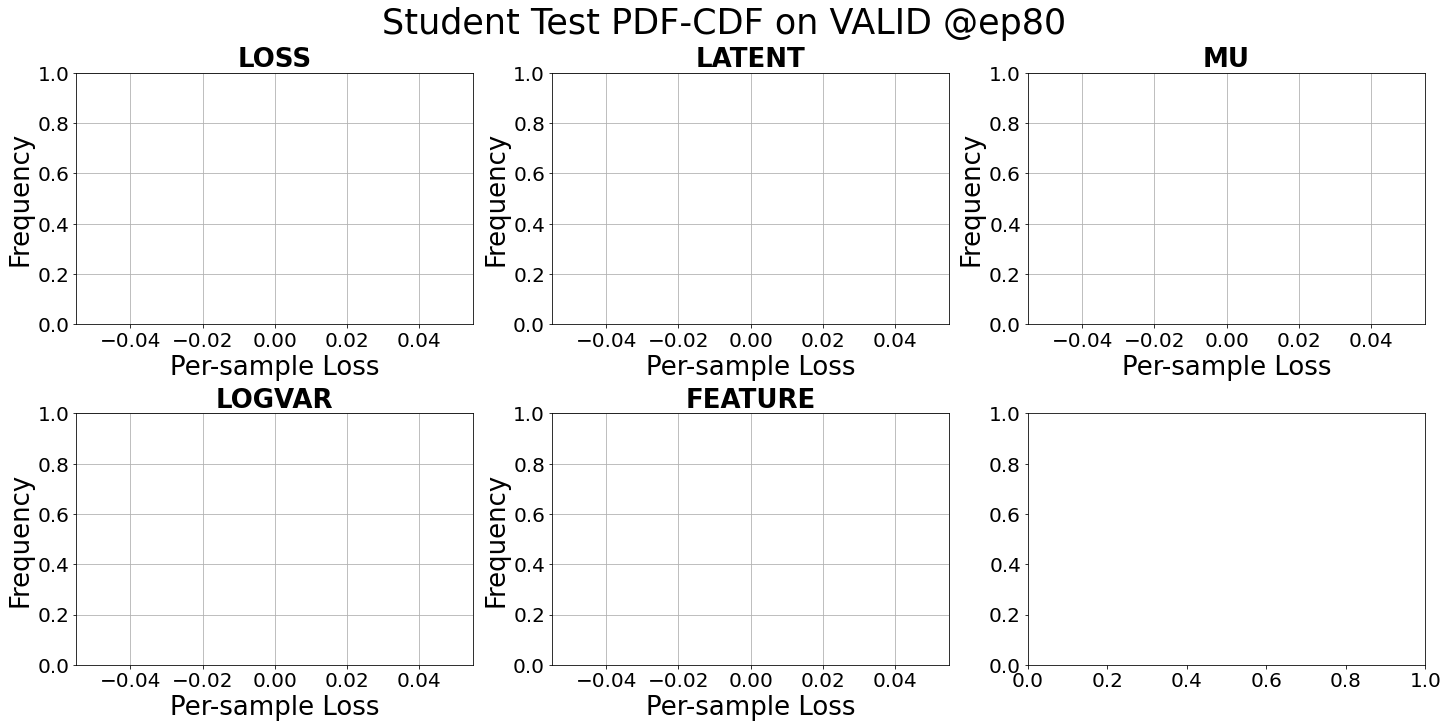

  0%|          |[00:00<?]

  0%|          |[00:52<?]

  0%|          |[00:00<?]

  0%|          |[00:01<?]

  0%|          |[00:00<?]

  0%|          |[00:04<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

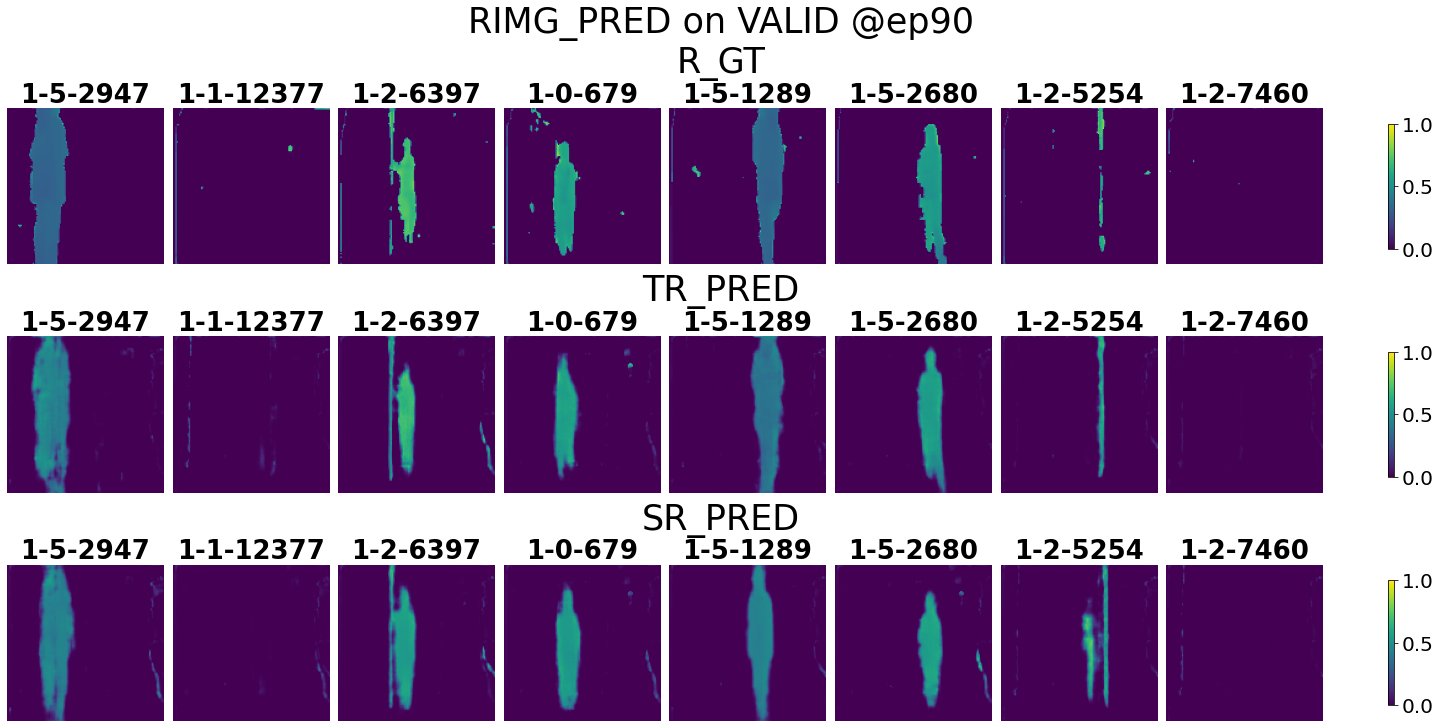

<Figure size 1440x720 with 0 Axes>

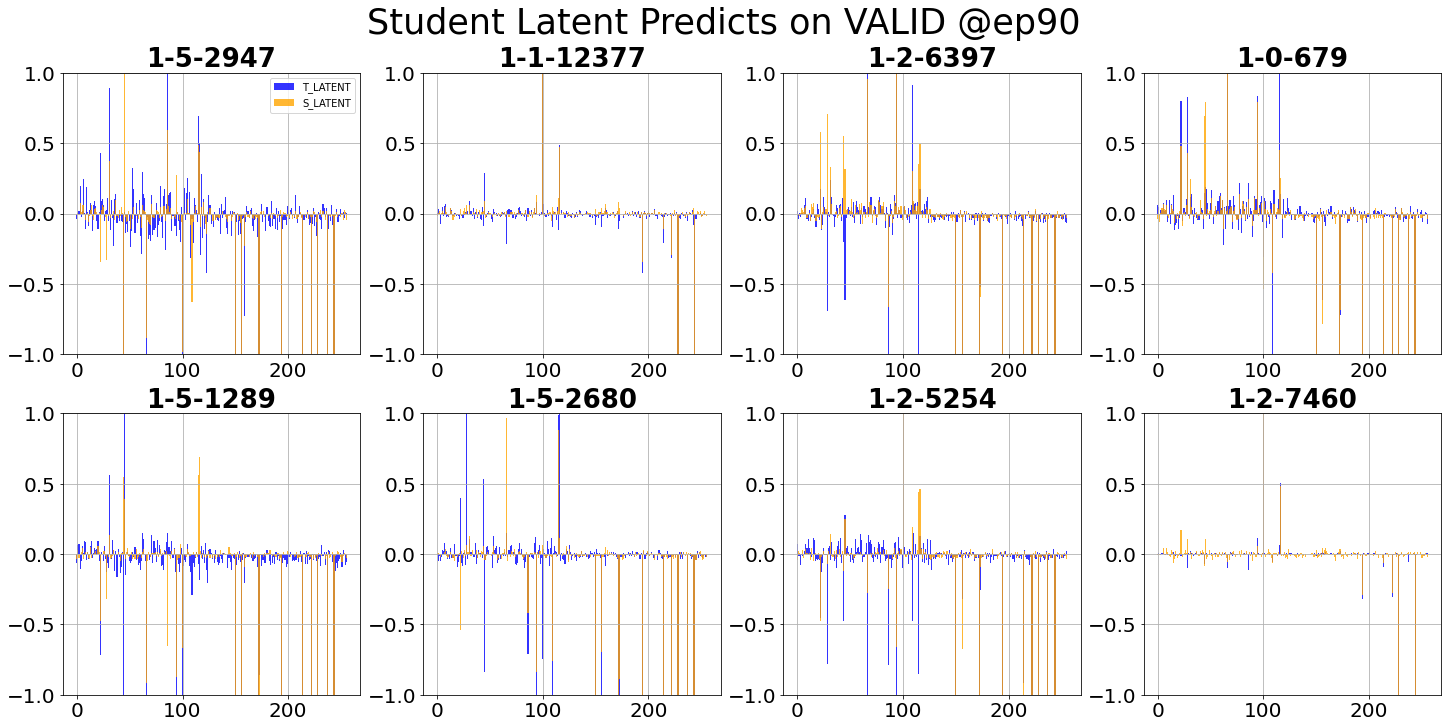

<Figure size 1440x720 with 0 Axes>

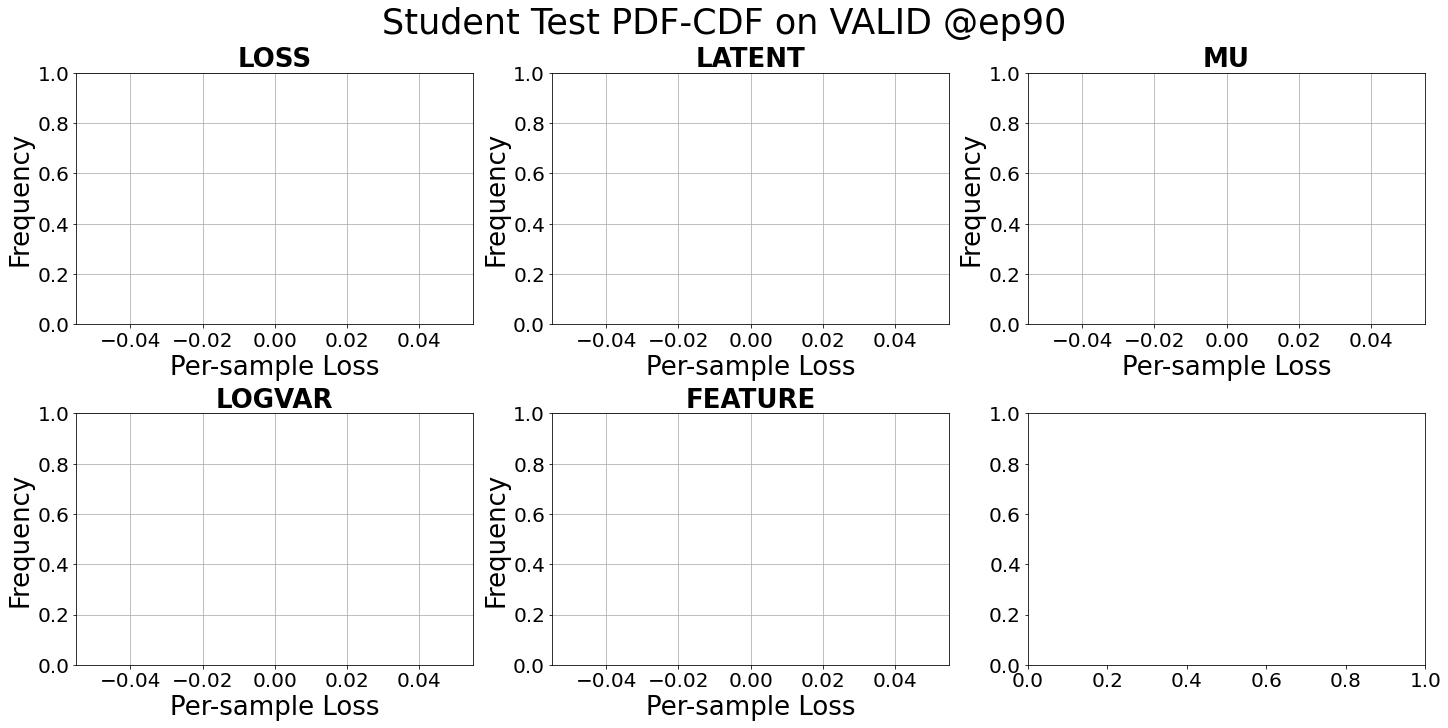

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:13<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

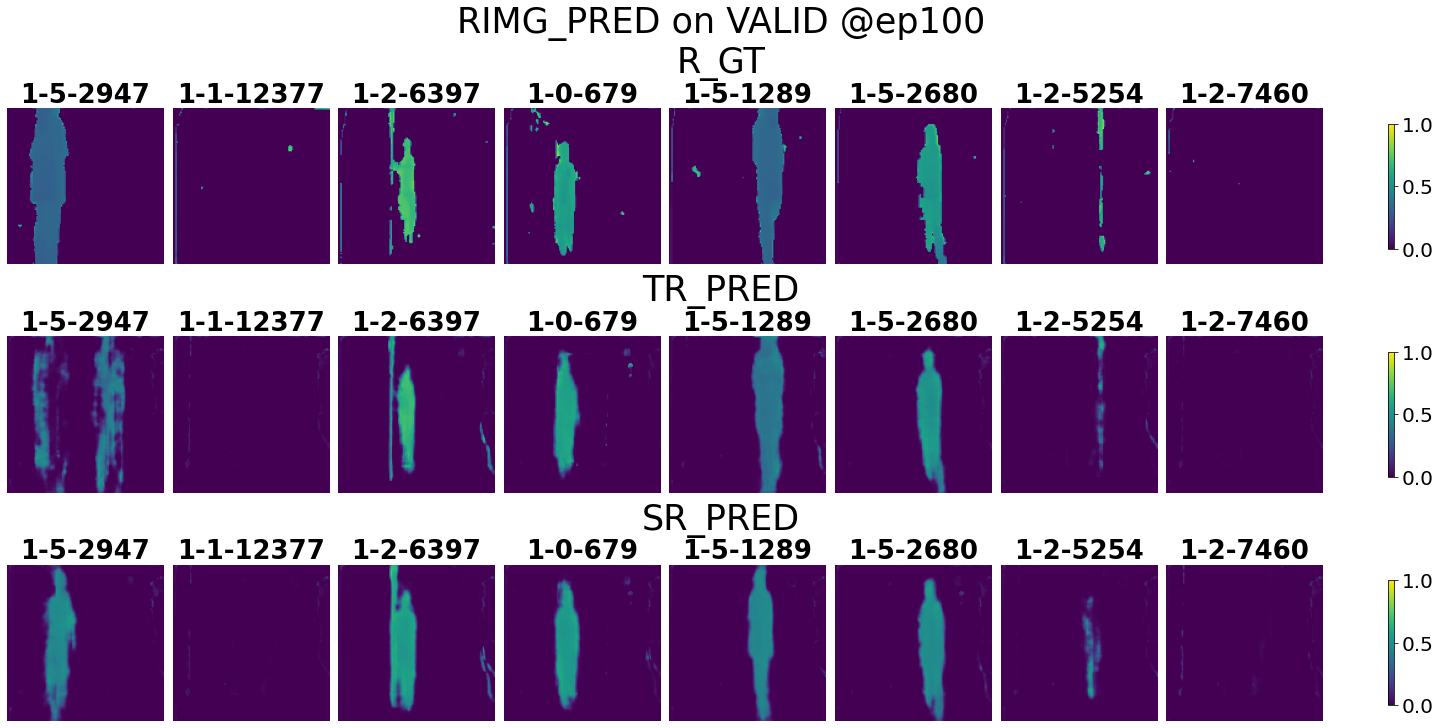

<Figure size 1440x720 with 0 Axes>

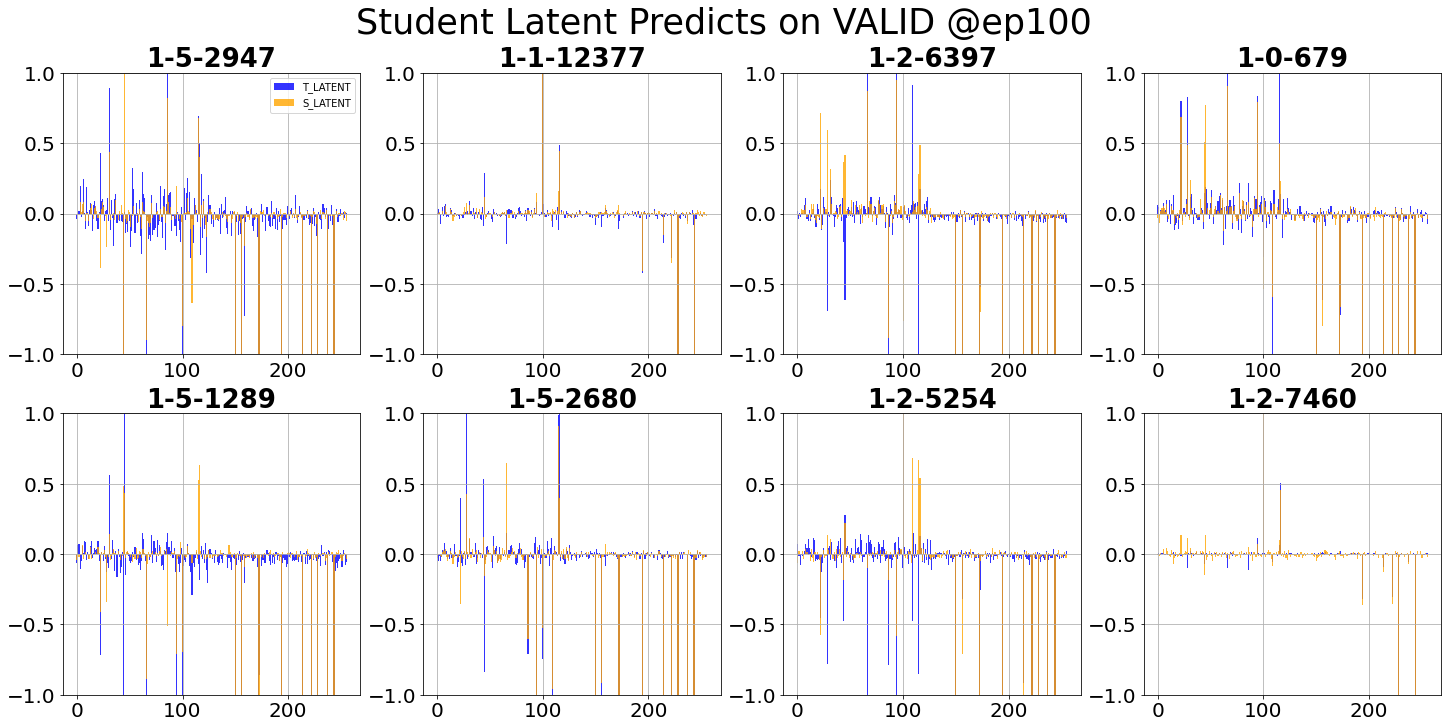

<Figure size 1440x720 with 0 Axes>

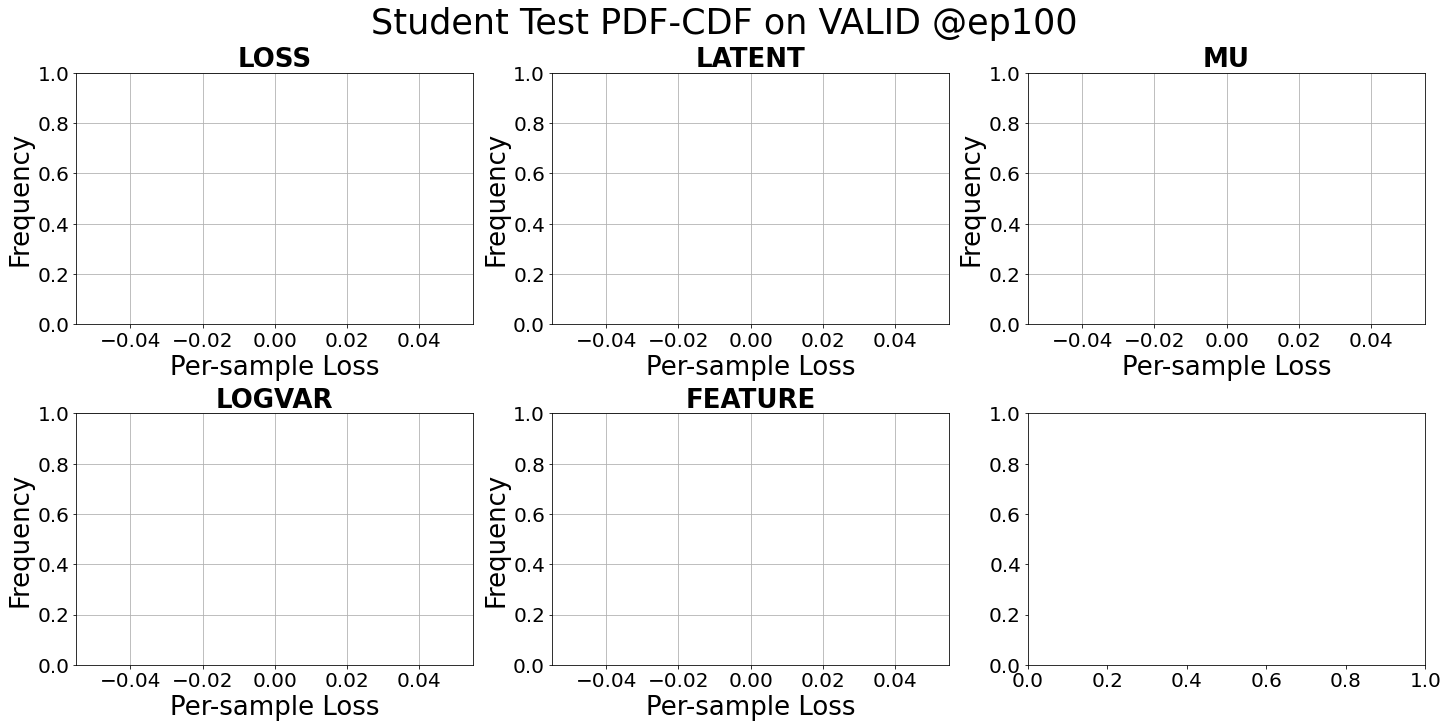

Saving models...
Saving imgen...
Saving rimgde...
Saving csien...
All saved!



  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

In [ ]:
gpu = 5
torch.cuda.set_device(gpu)
run_s()